#### Outlier
Outlier is an observation point that is distant from other observations.A data point that lies outside the overall distribution of the dataset.

Outliers can be a result of a error during data collection or it can be just an indication of variance in your data.If they are the result of error then we can ignore them, but if it is just a variance in the data we would need think a bit further. 

Let identify Outliers 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
data=pd.read_csv("C:\\Users\\AjayKumar\\Python_Jupyter_Files\\Projects\\wine Quality\\winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Method-1 : z score

Calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers.
Any observation that lies outside 3 Standard Deviations is considered as an outlier. 


1. One Standard Deviation from the Mean: 68% of Data
2. Two Standard Deviations from the Mean: 95% of Data
3. Three Standard Deviations from the Mean: 99.7% of Data

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

z-score= (Observation- average)/Standard Devation

##### let visualize if the Varaible Fixed acidity has outliers using BoxPlot

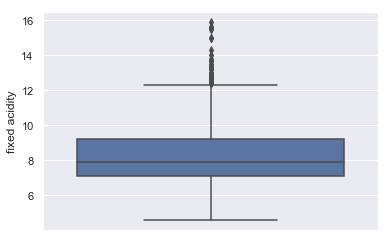

In [3]:
sns.boxplot(x=data["fixed acidity"],orient="v");

From the Boxplot we can conclude that there are outliers in the variable `fixed acidity', let identify the outliers using z score

In [4]:
fixed_acidity=data["fixed acidity"]
mean_f=np.mean(fixed_acidity)
std_f=np.std(fixed_acidity)
outliers=[]
threshold=3
for i in fixed_acidity:
    z_score=(i-mean_f)/std_f
    #print(z_score)
    if np.abs(z_score)>threshold:
        outliers.append(i)
print("Total Observations: {}".format(len(fixed_acidity)))
print("Number of Outliers: {}".format(len(outliers)))
print("Not Outlier observations: {}".format(len(fixed_acidity)-len(outliers)))
print("Outliers: \n {}".format(outliers))

Total Observations: 1599
Number of Outliers: 12
Not Outlier observations: 1587
Outliers: 
 [15.0, 15.0, 13.8, 14.0, 13.7, 13.7, 15.6, 14.3, 15.5, 15.5, 15.6, 15.9]


#### Methhod-2: IQR

An outlier is an observation which falls more than 1.5 IQR times above the 3rd Quartile or below the 1st Quartile

* IQR= Q3-Q1
* lower limit= Q1-1.5*IQR
* upper limit=Q3+1.5*IQR

Observation that lies below lower limit or above upper limit is considered as an Outlier.

A box-and-whisker plot uses quartiles (points that divide the data into four groups of equal size) to plot the shape of the data. The box represents the 1st and 3rd quartiles, which are equal to the 25th and 75th percentiles. The line inside the box represents the 2nd quartile, which is the median.

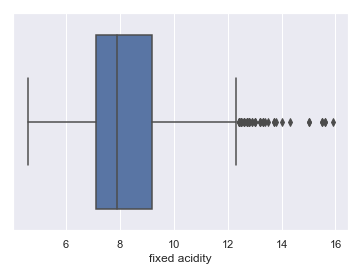

In [5]:
sns.boxplot(data["fixed acidity"]);

In [6]:
Q1,Q3=np.percentile(fixed_acidity,[25,75])
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for i in fixed_acidity:
    if (i<lower_limit) | (i>upper_limit):
        outlier.append(i)
print("IQR: {}".format(IQR))
print("Lower Limit: {}".format(lower_limit))
print("Upper Limit: {}".format(upper_limit))
print("Total Observations: {}".format(len(fixed_acidity)))
print("Number of Outliers: {}".format(len(outlier)))
print("Not Outlier observations: {}".format(len(fixed_acidity)-len(outlier)))
print("Outliers: \n {}".format(outlier))

IQR: 2.0999999999999996
Lower Limit: 3.95
Upper Limit: 12.349999999999998
Total Observations: 1599
Number of Outliers: 49
Not Outlier observations: 1550
Outliers: 
 [12.8, 12.8, 15.0, 15.0, 12.5, 13.3, 13.4, 12.4, 12.5, 13.8, 13.5, 12.6, 12.5, 12.8, 12.8, 14.0, 13.7, 13.7, 12.7, 12.5, 12.8, 12.6, 15.6, 12.5, 13.0, 12.5, 13.3, 12.4, 12.5, 12.9, 14.3, 12.4, 15.5, 15.5, 15.6, 13.0, 12.7, 13.0, 12.7, 12.4, 12.7, 13.2, 13.2, 13.2, 15.9, 13.3, 12.9, 12.6, 12.6]


### Multivariate Outlier Detection

#### Method-1 : z score

In [10]:
mean_d=np.mean(data)
std_d=np.std(data)
z=(data-mean_d)/std_d
data_outlier_removed=data[(z<3).all(axis=1)]
data_outlier=data[(z>3).all(axis=1)]
print("Dataset shape with Outliers removed:  {}".format(data_outlier_removed.shape))


Dataset shape with Outliers removed:  (1463, 12)


#### Method-2 : IQR

In [17]:
Q1,Q3=np.percentile(data,[25,75])
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
data_outlier_re=data[~((data < (Q1-1.5*IQR))|(data > (Q3+1.5*IQR))).any(axis=1)]


print("Dataset shape with Outliers removed:  {}".format(data_outlier_re.shape))

Dataset shape with Outliers removed:  (388, 12)
